# **Cheminformatics in Python [PART 2.2] Predicting Solubility of Molecules using PyCaret** 


In this Jupyter notebook, we will continue our journey into the world of Cheminformatics (i.e. lies at the interface of Informatics and Chemistry) by simplifying this notebook via the use of the low-code machine learning library PyCaret.


**Information from the previous notebook:**

We will be reproducing a research article (by John S. Delaney$^1$) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).

This idea for this notebook was inspired by the excellent blog post by Pat Walters$^2$ where he reproduced the linear regression model with similar degree of performance as that of Delaney. This example is also briefly described in the book ***Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More***.$^3$

## **1. Install PyCaret**

In [ ]:
! pip install pycaret

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 266kB 8.5MB/s 
     |████████████████████████████████| 102kB 6.6MB/s 
     |████████████████████████████████| 266kB 11.3MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 65.9MB 61kB/s 
     |████████████████████████████████| 1.2MB 48.3MB/s 
     |████████████████████████████████| 6.8MB 50.3MB/s 
     |████████████████████████████████| 1.6MB 40.6MB/s 
     |████████████████████████████████| 12.4MB 38.9MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 3.1MB 46.4MB/s 
     |████████████████████████████████| 604kB 45.2MB/s 
     |████████████████████████████████| 2.1MB 38.6MB/s 
     |████████████████████████████████| 235kB 49.2MB/s 
     |████████████████████████████████| 552kB 41.0MB/s 
   

## **2. Read in dataset**

In [ ]:
import pandas as pd
import requests
import io

In [ ]:
delaney_with_descriptors_url = 'https://gitlab.com/Harsha2409/cheminformatics_computational_drug_discovery/raw/master/delaney_solubility_with_descriptors.csv'
get_data = requests.get(delaney_with_descriptors_url)
dataset = pd.read_csv(io.StringIO(get_data.text))

In [ ]:
dataset

MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]

## **3. Model Building**

### **3.1. Model Setup**

In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(data = dataset, target = 'logS', train_size=0.8, silent=True)

 
Setup Succesfully Completed.


### **3.2. Model comparison**

Subsequent blocks of codes here will be using the ``training set`` (the 80% subset) for model building.

In [ ]:
compare_models()

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7954, verbose=0, warm_start=False)

### **3.3. Model Creation**

In [ ]:
et = create_model('et')

### **3.4. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal. 

In [ ]:
tuned_et = tune_model(et, n_iter = 50, optimize = 'RMSE')

In [ ]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=30, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=80, n_jobs=-1, oob_score=False,
                    random_state=7954, verbose=0, warm_start=False)


### **4. Model Analysis**

#### **4.1. Plot Models**
We are performing regression and so further details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

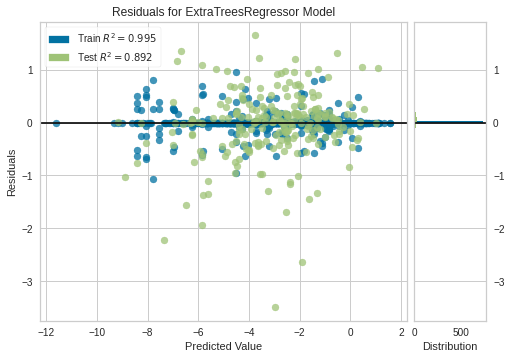

In [ ]:
plot_model(et, 'residuals')

**Prediction Error Plot**

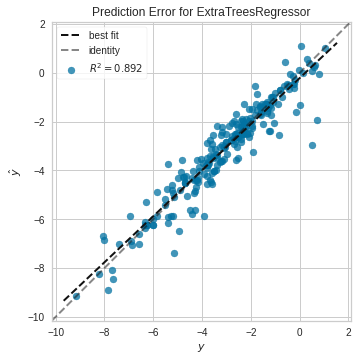

In [ ]:
plot_model(et, 'error')

**Cooks Distance Plot**

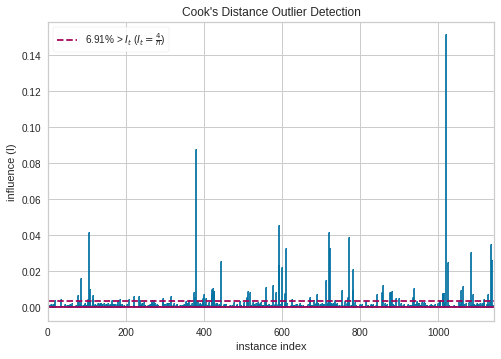

In [ ]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

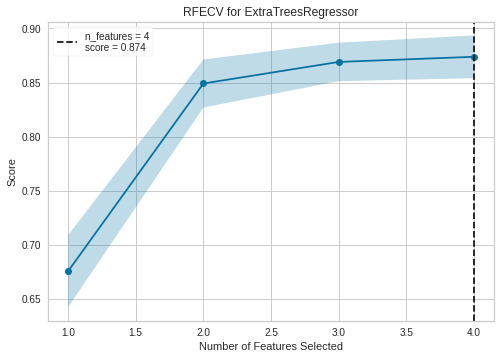

In [ ]:
plot_model(et, 'rfe')

**Learning Curve**

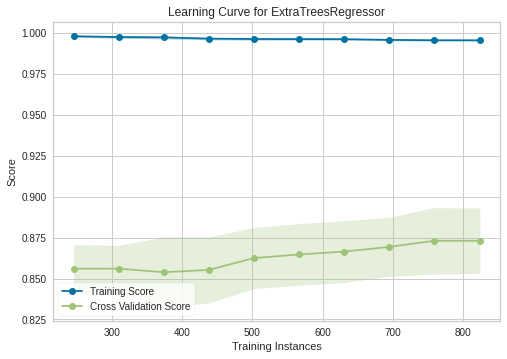

In [ ]:
plot_model(et, 'learning')

**Validation Curve**

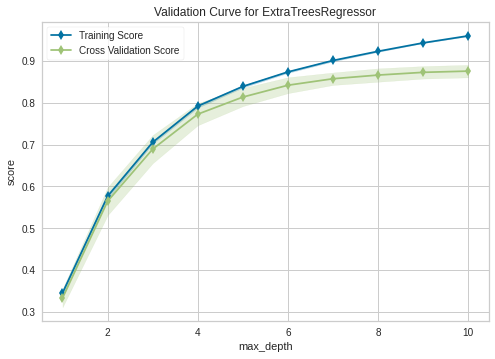

In [ ]:
plot_model(et, 'vc')

**Manifold Learning**

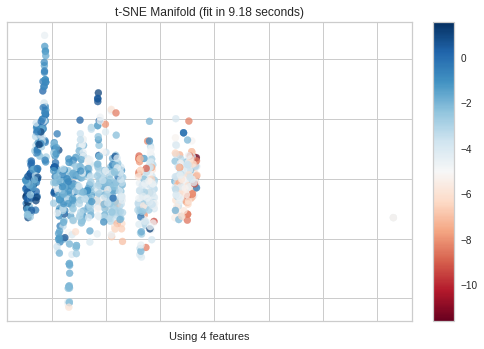

In [ ]:
plot_model(et, 'manifold')

**Feature Importance**

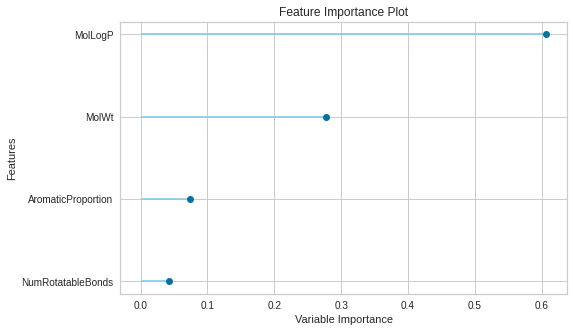

In [ ]:
plot_model(et, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [ ]:
plot_model(et, 'parameter')

Parameters
bootstrap                     False
ccp_alpha                         0
criterion                       mse
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf          0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                   7954
verbose                           0
warm_start                    False

Here, the hyperparameter of the tuned model is displayed below.

**Show all plots**

The ``evaluate_model()`` displays all available plots here.

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### **4.2. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

In [ ]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394114 sha256=27c9ee6069fdf157df64a8d7fd35ca7410c63500d66087bfb651f5ca828d474d
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


**Summary Plot**

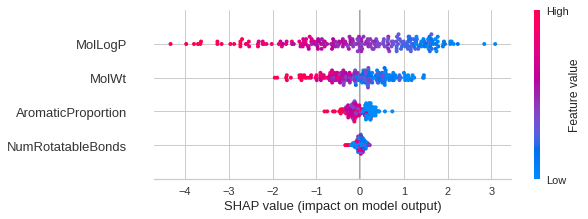

In [ ]:
interpret_model(et)

**Correlation Plot**

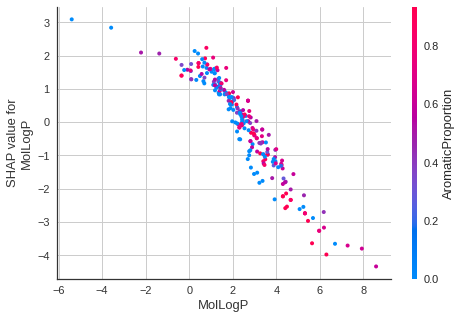

In [ ]:
interpret_model(et, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [ ]:
interpret_model(et, plot = 'reason', observation = 10)

### **6.6. External Testing**

We will now apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [ ]:
prediction_holdout = predict_model(et)

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  0.4402  0.4223  0.6498  0.8922  0.1881  0.2087

In [ ]:
prediction_holdout.head()

MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS   Label
0   2.9067  239.318                3.0            0.666667 -2.980 -3.3325
1   4.2210  337.463                0.0            0.200000 -5.507 -5.1525
2   0.9242  338.772                2.0            0.545455 -3.451 -3.1364
3  -0.2313  170.168                1.0            0.000000 -1.228 -1.3174
4   1.3296  300.266                0.0            0.272727 -2.700 -2.9365

---

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.

5. Scott M. Lundberg and Su-In Lee. [A Unified Approach to Interpreting Model Predictions](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions), A Unified Approach to Interpreting Model Predictions, ***Advances in Neural Information Processing Systems 30 (NIPS 2017)***, 2017.